### Asta Habtemichael 
### BIO 539 
### Final Project 
### Code Book

## Title: Text Mining on Students' Reflective Essays


## Set up and loading libraries

In [2]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300

import seaborn as sns
sns.set_style("whitegrid")

In [4]:
#Loading libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation
import nltk as nlp

In [5]:
# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

### Loading data into Pandas

The original data is stored in CSV format where the essays are stored in a column titled 'text'

In [7]:
#loading Fall2016.csv into pandas  
df = pd.read_csv('../FinalProject/Fall2016.csv')


It is often useful to look at the data set in order to orient yourself with the data and how it is arrnaged. Since the main data we need for our analysis is stored in *'text'* column we will look into that column.

In [8]:
#Viewing the data to explore, see how it is organized and get familiar with the data 
#Specifically viewing in the column 'text' of the dataset to see how the essays are written and organized 
col=df[['text']]
col

,text
0,"100565508/\r\nMy belief is to not judge others on appearances. Many people �judge a book by its cover�, but it is important in life not to do that. Growing up, during school and out of school, I was taught to not judge someone by the way they look. Someone may look a certain way but their personality is what really matters.\r\nWhen I went on a mission trip with my church, we went to Lynn, Massachusetts. The town had a high poverty rate. The locals were very welcoming and had a positive attitude. When people see homeless people, they may walk away but many do not take the time to get to know their story. I volunteered at a soup kitchen during the trip, and had to sit with the guests and have conversations. I thought they would not want to converse much, but many wanted to share their stories. This is not something I would have normally done and I am glad for such a wonderful experience. \r\nEntering college has also taught me not to judge someone on appearances. Every day is a new opportunity to meet new people and that can only happen if you have an open mind. You never know who may end up becoming your closest friends. There may be many people who judge based on looks, and they are close minded because that is not what is really important. I have made friends with who I never thought I could approach. Taking the first step and introducing yourself is key to letting people know who you really are. \r\n\t"
1,"100000100/\r\nI believe that the major medical companies and heads of the medical communities in America are corrupt. I believe that the people of America are lied to and live their everyday lives without seeming to care or bringing this issue to attention. It is sad to say/believe that those who are supposed to be creating medicines and advances in the medical field in order to help protect and save the lives of people do not as much care about the health of the people rather their incomes and the money that they will make. For example, I completely believe that there is, or could be, a treatment that could get rid of cancer, maybe not completely, however, the technological advances and intelligence of humans could find a treatment that nearly gets rid of cancer or other diseases/disabilities that do not require supplements. The medical community, especially those in high positions such as medical company heads, earn way more money by providing medications/treatments that people are required to take daily and have to continue to buy throughout their life if they want to suppress their disability or illness rather than providing such people with medications that may possibly get rid of the illness completely or for a longer span of time. This belief is along the same lines of which a lighting company could easily make light bulbs that never burn out or last a significant amount of time longer than those of which that are available to buy. However, if this were to be created people would not have to buy the product as much which would result in much less income for those companies. In this case, an example would be the treatment of someone with anxiety. Rather than developing something that could possibly get rid of the person�s anxiety or a drug that suppresses the anxiety much longer, it is much more profitable for medical companies to make a drug that only lasts for a limited time which means that this person is forced to continually buy the drug in order to prevent the anxiety in this case. I wish to someday find a way to fix this problem and I believe that if I am not able too, one day someone will be able to fix the corruption and care more about the people and the health of the nation, even the world, and make treatments that help rid illnesses instead of minor medications that are designed to suppress the illness in order to make more money for themselves. Of course, it is much easier said than done as a bystander, however, I think that there are more than enough capable people that will realize the health 

As you can observe it above, the data has lots of problems like newlines, markdowns, quoting, and id tags are in the text body as well. It needs more cleaning before it is useful for text analytics (e.g. /r etc.). However, before going further into data cleaning let us learn more about the data type as that would be helpful to configure our data clean up process. 

### Cleaning Data

First, we need to make sure the structure of the data is set correctly. *df.dtypes* gives the actual data types. Strings are represented by the type *object*.

In [9]:
#setting the data type
df=df.astype(str)
df.dtypes

Unnamed: 0    object
doc_id        object
text          object
id            object
dtype: object

The initial cleaning step will be removing the *id* tags that were embeded at the beginning of each essay.

In [10]:
#Removing the first 11 digits out of the text column so to remove the id tags.
df['text']=df['text'].str[11:]

Now we will clean the essay body by either reconstructing or replacing issues. We will achieve that by string cleaning function as follows. 

In [11]:
#Removing tabs, special characters, apostrohies, and other unwanted markings 
import re
def clean(s):
    s = s.replace(r'<lb>', "\n")# reconstructing the line endings
    s = s.replace(r'<tab>', "\i")# reconstructing tabs
    s = re.sub(r'<br */*>', "\n", s)# reconstructing the line endings
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")# replacing markings
    s = s.replace("&amp;", "&")
    
    s = re.sub(r'\(https*://[^\)]*\)', "", s)# removing any URLs as they are not good for text mining
    
    s = re.sub(r'https*://[^\s]*', "", s)# removing normal urls
    s = re.sub(r'_+', ' ', s)#replacing underscores with space
    s = re.sub(r'"+', '"', s)# removing multiple quotes
    s = re.sub(r'\r', ' ', s)# replacing with space
    s = re.sub(r'�', ' ', s)# replacing aposthrophe and other special marks with a space
    s = re.sub(r'\n', ' ', s)# replacing newline with a space
    return str(s)


Now that we have set up the string clean up function, it should be applied to all rows in the data frame. The clean version of the text needs to be saved in a new column '*selftext_clean*'. It should be noted that the datatype for the column should be set approperiately as empty string for all rows. 

In [12]:
#Creating a new column to store the cleaned essays 
df["selftext_clean"] = ''
#Iterating clean data
for i, row in df.iterrows():
    df.at[i, "selftext_clean"] = clean(row.text)

In [13]:
#Checking the data frame 
df.head()

,Unnamed: 0,doc_id,text,id,selftext_clean
0,1,2016_10.txt,"\nMy belief is to not judge others on appearances. Many people �judge a book by its cover�, but it is important in life not to do that. Growing up, during school and out of school, I was taught to not judge someone by the way they look. Someone may look a certain way but their personality is what really matters.\r\nWhen I went on a mission trip with my church, we went to Lynn, Massachusetts. The town had a high poverty rate. The locals were very welcoming and had a positive attitude. When people see homeless people, they may walk away but many do not take the time to get to know their story. I volunteered at a soup kitchen during the trip, and had to sit with the guests and have conversations. I thought they would not want to converse much, but many wanted to share their stories. This is not something I would have normally done and I am glad for such a wonderful experience. \r\nEntering college has also taught me not to judge someone on appearances. Every day is a new opportunity to meet new people and that can only happen if you have an open mind. You never know who may end up becoming your closest friends. There may be many people who judge based on looks, and they are close minded because that is not what is really important. I have made friends with who I never thought I could approach. Taking the first step and introducing yourself is key to letting people know who you really are. \r\n\t",100565508,"My belief is to not judge others on appearances. Many people judge a book by its cover , but it is important in life not to do that. Growing up, during school and out of school, I was taught to not judge someone by the way they look. Someone may look a certain way but their personality is what really matters. When I went on a mission trip with my church, we went to Lynn, Massachusetts. The town had a high poverty rate. The locals were very welcoming and had a positive attitude. When people see homeless people, they may walk away but many do not take the time to get to know their story. I volunteered at a soup kitchen during the trip, and had to sit with the guests and have conversations. I thought they would not want to converse much, but many wanted to share their stories. This is not something I would have normally done and I am glad for such a wonderful experience. Entering college has also taught me not to judge someone on appearances. Every day is a new opportunity to meet new people and that can only happen if you have an open mind. You never know who may end up becoming your closest friends. There may be many people who judge based on looks, and they are close minded because that is not what is really important. I have made friends with who I never thought I could approach. Taking the first step and introducing yourself is key to letting people know who you really are. \t"
1,2,2016_100.txt,"\nI believe that the major medical companies and heads of the medical communities in America are corrupt. I believe that the people of America are lied to and live their everyday lives without seeming to care or bringing this issue to attention. It is sad to say/believe that those who are supposed to be creating medicines and advances in the medical field in order to help protect and save the lives of people do not as much care about the health of the people rather their incomes and the money that they will make. For example, I completely believe that there is, or could be, a treatment that could get rid of cancer, maybe not completely, however, the technological advances and intelligence of humans could find a treatment that nearly gets rid of cancer or other diseases/disabilities that do not require supplements. The medical community, especially those in high positions such as medical company heads, earn way more money by providing medications/treatments that people are required to take daily and have to continue to buy throughout their life if they want to suppress their d

The difference between the raw data '*text*' and the cleaned data '*selftext_clean*' is clearly observable. Now we have the data cleaned up we will move to further linguistic analysis. 

###### Adding Natural Language Processing components 

For the linguistics operation we will be using the *spaCy* package as oppose to the *NLTK* of pandas for its complexity and pre-trained language models. We will be working wiht the corpus which we will set below. 

In [14]:
#Importing the spacy library for English language 
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")
#looping over each row and perform the linguistic operation of separating words into nouns, verbs, and adjectives
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["selftext_clean"] and len(str(row["selftext_clean"])) < 1000000):
        doc = nlp(str(row["selftext_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "selftext_lemma"] = " ".join(lemmas)                
        df.at[i, "selftext_nouns"] = " ".join(nouns)
        df.at[i, "selftext_adjectives"] = " ".join(adjectives)
        df.at[i, "selftext_verbs"] = " ".join(verbs)
        df.at[i, "selftext_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)

0


Lets have a look on the basic properities of the dataset to see what the new structure looks like. We will explore column summaries to give us an idea about the data as well. 

In [15]:
#colmns names and datatypes
df.dtypes

Unnamed: 0             object 
doc_id                 object 
text                   object 
id                     object 
selftext_clean         object 
selftext_lemma         object 
selftext_nouns         object 
selftext_adjectives    object 
selftext_verbs         object 
selftext_nav           object 
no_tokens              float64
dtype: object

*df.count* gives the value count per column of the data set while len(df) gives the total number of records in a data frame. This way we will identify if all the recordings in the columns from the raw data were transfered to the same extent in our new columns as attributed by the function for number of rows in each column supposed to be equal. 

In [16]:
# number of values per column
df.count()



Unnamed: 0             153
doc_id                 153
text                   153
id                     153
selftext_clean         153
selftext_lemma         153
selftext_nouns         153
selftext_adjectives    153
selftext_verbs         153
selftext_nav           153
no_tokens              153
dtype: int64

In [17]:
#Length of the dataframe
len(df)

153

The pandas *describe* method computes statistical summaries on the columns of the dataframe for both categorical and numerical features and the outputs are a bit different respectively as we see below. 

For numrical data the *describe* return calculates the basic measures of dispersion. 

In [18]:
# describe numerical columns
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
no_tokens,153.00,601.97,113.51,214.00,558.00,605.00,672.00,803.00


In [19]:
# describe categorical columns of type np.object 
# the include=np.object (data type) is used to explicitly call the non-numerical features
df[['selftext_nouns', 'selftext_adjectives','selftext_verbs' ]] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
selftext_nouns,153,123,belief other appearance people book cover life school school way way personality mission trip church Lynn Massachusetts town poverty rate local attitude people people time story soup kitchen trip guest conversation story experience college appearance day opportunity people mind friend people look friend step people,4
selftext_adjectives,153,111,many important certain high welcoming positive homeless many many glad wonderful new new open close many minded important first key,4
selftext_verbs,153,121,judge judge be do grow teach judge look look be matter go go have have see walk take get know volunteer have sit have think want converse want share do be enter teach judge meet happen have know end become be judge base be be make think approach take introduce let know,4


The *count* return shows the number of counts, the *unique* gives the values for the unique word, the most frequent value is given by *top*, and *freq* tells the frequency value of the top most frequent word.

In [20]:
# sample cleaned text and tokens tagged as nouns
df[['selftext_clean', 'selftext_adjectives', 'selftext_nouns']].sample(2)

,selftext_clean,selftext_adjectives,selftext_nouns
143,"Success. I believe success is measured by many different things, but the most important aspects are gratitude and happiness. Not how much money you make or what job you have or what society dictates. If I am not happy or I do not recognize the chances I ve been given, I cannot consider myself successful. There are many aspects of success, more than I could ever begin to list. Overall, every experience contributes in its own special way. I am only 19 and yet already I have changed my mind about what makes me happy hundreds if not thousands of times. In my freshman year of college, I changed my major three times until I finally found something, I am interested in. Or at least something I think I am interested in. I have the luxury of knowing my parents will be proud of me no matter what I choose, and for that I am eternally grateful. I know many people do not have that comfort and their success is dictated by others around them. Perhaps their parents are pushing them to go to med school or be an engineer, but I get to choose my own interests, which my parents understand is not any one thing. I am able to change my mind and find my own way in life, my own success, my own happiness. I can never thank my parents enough for the freedom they have given me. I believe gratitude is a large part of success. I also love to travel, but with a purpose. I feel like being in one place for too long inhibits my ability to grow and learn about the world around me. I thrive on new experiences that challenge my thoughts and ideals. I travel with my dad every winter to a new place and every time I learn something new and am confronted with an aspect of humanity I hadn t experienced before. In Greece this past winter my father and I came across a man from the Middle East who went home for a wedding and was stuck there for six months due to his ethnicity before being able to return to Greece. He watched friends and family get shot in front of him yet retold the story of his life to us as though we were now a part of his family. I could never imagine being in his shoes, but I felt a little more connected to him and humanity that day. I believe success is knowing you have a good life, and are happy with who you are, but it is also recognizing the fact that so many people do not have the opportunities you do. In order to be successful, you must also be compassionate, empathetic, and aware of the challenges facing humanity. If you cannot appreciate the fortune you have, how will you ever know your true happiness? I strive to make an impact. All my life when asked what I plan to do with my life I responded I plan to change the world. In all seriousness, I do plan to change the world. It may not be on a large scale; it could simply be making a positive impact on someone else s life. On the other hand, I could play a role in mitigating clean water issues that affect so much of the world. However, my ultimate plan is to be happy, and make every experience count. If I can manage that, I can call my life a great success.",many different important much happy successful many more own special happy major interested least interested proud grateful many med own able own own own large long new new new past able connected good happy many successful compassionate empathetic aware true large positive other clean much ultimate happy great,success success thing aspect gratitude happiness money job society chance aspect success experience way mind hundred thousand time freshman year college time luxury parent people comfort success other parent school engineer interest parent thing mind way life success happiness parent freedom gratitude part success purpose place ability world experience thought ideal dad winter place time aspect humanity t Greece winter father man Middle East wedding month ethnicity Greece friend family front story life part family shoe humanity day success life fact people opportunity order challe

## Exploring Word Frequencies

The length of the text measured by the number of tokens after cleaning vary quite a lot. We shall use *my-tokenizer* create a list of tokens from a list of documents. We are taking this approach for the spaCy tokenization had some quality issues as you can observed (above) with *selftext_adjectives* as the listed items are not all adjectives. 

In [21]:
#defining the tokenizer 
#tokenize by splitting the strings as they are space separated lists
def my_tokenizer(text):
    return text.split() if text != None else []

In [22]:
# transform list of documents into a single list of tokens
#selecting the column of the data frame >> Map each document to a list of tokens >> 
#concatenate these lists of tokens into a single list 
tokens = df.selftext_nouns.map(my_tokenizer).sum()

In [23]:
print(tokens[:20])

['belief', 'other', 'appearance', 'people', 'book', 'cover', 'life', 'school', 'school', 'way', 'way', 'personality', 'mission', 'trip', 'church', 'Lynn', 'Massachusetts', 'town', 'poverty', 'rate']


Python has a built in package *Counter* for counting frequencies. The *most_common (n)* function returns the top-n elements in the list which will be useful for our purposes of identifying word usage. 

In [24]:
#counting the word frequency as per the tokenizers
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('life', 474),
 ('people', 371),
 ('time', 337),
 ('thing', 314),
 ('school', 284),
 ('year', 277),
 ('t', 262),
 ('belief', 213),
 ('day', 203),
 ('person', 203),
 ('way', 185),
 ('family', 184),
 ('work', 168),
 ('friend', 150),
 ('world', 112),
 ('parent', 106),
 ('college', 97),
 ('class', 94),
 ('other', 93),
 ('girl', 90)]

Now, it is time to remove stop words from our list of tokens. Stop words are words that are list of common words such as the definit and indefinite articles, prepositions, conjunciton etc. which are not significant components of the text body. 

In [25]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
#Remove stopwords from a list of tokens
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

To simplify our work in ploting it is much easier to convert our most common tokens tuples into a data frame. 

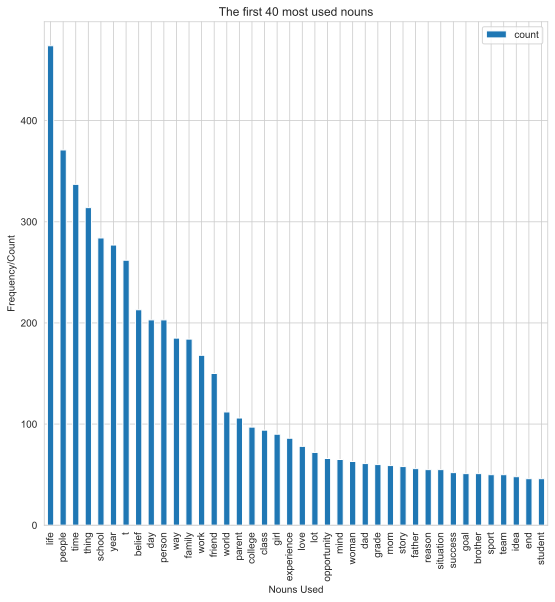

In [26]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(40),
                                    columns=['token', 'count'])

# create bar plot
ax=freq_df.plot(kind='bar', x='token', figsize= (10,10));
ax.set(xlabel="Nouns Used", ylabel="Frequency/Count")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8)
plt.title('The first 40 most used nouns')
plt.savefig('Nouns.png')

### Using Word Clouds

Word clouds are popular ways of interactive visualization of word usage and word frequencies. Using the *wordcloud* package we will generate word clouds. 

In [27]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

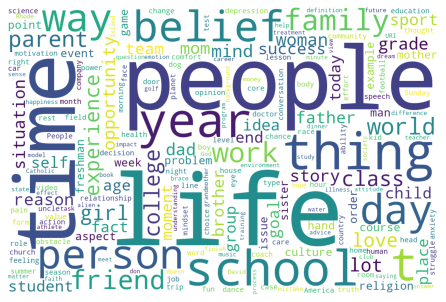

<Figure size 1800x1200 with 0 Axes>

In [28]:
# create wordcloud for nouns 
wordcloud(counter)
plt.savefig("Nouncloud.png", format= "png")

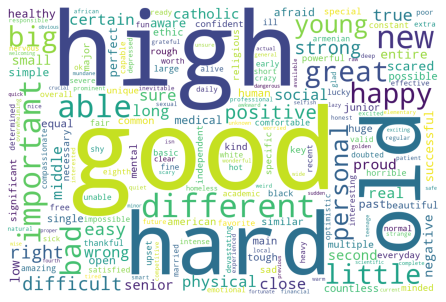

<Figure size 1800x1200 with 0 Axes>

In [29]:
#transforming the list of documents into a single list of tokens pertaining to adjectives
tokens2 = df.selftext_adjectives.map(my_tokenizer).sum()
#reconstructing the counter         
counter2 = Counter(remove_stopwords(tokens2))
#Creating wordcloud for adjectives
wordcloud(counter2)
plt.savefig("Ajectivecloud.png", format= "png")

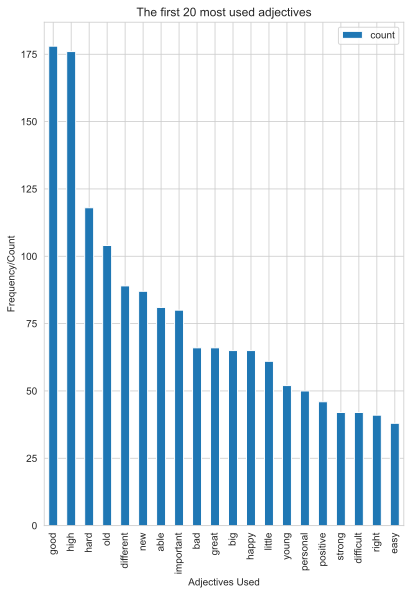

In [302]:
# convert list of tuples into data frame pertaining to adjectives
freq_df = pd.DataFrame.from_records(counter2.most_common(20),
                                    columns=['token2', 'count'])

# create bar plot
ax=freq_df.plot(kind='bar', x= 'token2', figsize= (10,10));
ax.set(xlabel="Adjectives Used", ylabel="Frequency/Count")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.title('The first 20 most used adjectives')
plt.savefig('adjectives.png')

## References

Blascovich, J., Spencer, S. J., Quinn, D., & Steele, C. (2001). African Americans and high blood pressure: The role of stereotype threat. Psychological Science, 12, 225-229.

Cohen, G. L., & Garcia, J. (2008). Identity, belonging, and achievement: A model, interventions, implications. Current Directions in Psychological Science, 17, 365-369.

Cohen, G. L., Garcia, J., Apfel, N., & Master, A. (2006). Reducing the racial achievement gap: A social-psychological intervention. Science, 313, 1307-1310.

Cook, J. E., Purdie-Vaughns, V., Garcia, J., & Cohen, G. L. (2012). Chronic threat and contingent belonging: Protective benefits of values affirmation on identity development. Journal of Personality and Social Psychology, 102, 479-496.

Martens, A., Johns, M., Greenberg, J., & Schimel, J. (2006). Combating stereotype threat: The effect of self-affirmation on women’s intellectual performance. Journal of Experimental Social Psychology, 42, 236-243.

Sherman, D. K., & Cohen, G. L. (2006). The psychology of selfdefense: Self-affirmation theory. In M. P. Zanna (Ed.), Advances
in experimental social psychology (Vol. 38, pp. 183-242). San Diego, CA: Elsevier Academic Press.

Shnabel, N., Purdie-Vaughns, V., Cook, J. E., Garcia, J., & Cohen, G. L. (2013). Demystifying Values-Affirmation Interventions: Writing About Social Belonging Is a Key to Buffering Against Identity Threat. Personality and Social Psychology Bulletin, 39(5), 663–676.

Steele, C. M. (1997). A threat in the air: How stereotypes shape intellectual identity and performance. American Psychologist,
52, 613-629.

Steele, C. M., & Aronson, J. (1995). Stereotype threat and the intellectual test performance of African Americans. Journal of Personality and Social Psychology, 69, 797-811.

Most codes used for this project were adopted from https://github.com/datanizing/reddit-selfposts-blog/blob/master/02-data_exploration.ipynb and were amended as necessary. 
